### Model Adaboost

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

In [39]:
train_data = pd.read_csv('train_pret.csv')

In [40]:
df = train_data.copy()

In [41]:
df.drop('Loan_ID',axis=1, inplace=True)

In [42]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:
df.Gender.fillna('Male',inplace=True)
df.Married.fillna('Yes', inplace=True)
df.Dependents.fillna(0, inplace =True)
df.Self_Employed.fillna('No', inplace=True)
df.LoanAmount.fillna(146.41, inplace=True)
df.Loan_Amount_Term.fillna(360, inplace=True)
df.Credit_History.fillna(1.0, inplace=True)

In [44]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [45]:
data_object= df.drop(['Loan_Amount_Term','LoanAmount','CoapplicantIncome','ApplicantIncome','Loan_Status','Dependents'],axis=1)




In [46]:
data_object.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area
0,Male,No,Graduate,No,1.0,Urban
1,Male,Yes,Graduate,No,1.0,Rural
2,Male,Yes,Graduate,Yes,1.0,Urban
3,Male,Yes,Not Graduate,No,1.0,Urban
4,Male,No,Graduate,No,1.0,Urban


In [47]:
cols =['Gender','Married', 'Education','Self_Employed','Credit_History','Property_Area']

for c in cols:
    data_object[c] =data_object[c].astype('category')

In [48]:
data_object = pd.get_dummies(data_object, drop_first=False)

In [49]:
data_object.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,1,0,0,1,0,0,1
1,0,1,0,1,1,0,1,0,0,1,1,0,0
2,0,1,0,1,1,0,0,1,0,1,0,0,1
3,0,1,0,1,0,1,1,0,0,1,0,0,1
4,0,1,1,0,1,0,1,0,0,1,0,0,1


In [50]:
data_object.shape

(614, 13)

In [51]:
X = data_object
y = df['Loan_Status']

In [194]:
from sklearn.preprocessing import LabelBinarizer

In [52]:
y = y.map({'Y':1, 'N':0})

In [53]:
X

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,1,0,0,1,0,0,1
1,0,1,0,1,1,0,1,0,0,1,1,0,0
2,0,1,0,1,1,0,0,1,0,1,0,0,1
3,0,1,0,1,0,1,1,0,0,1,0,0,1
4,0,1,1,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,1,0,0,1,1,0,0
610,0,1,0,1,1,0,1,0,0,1,1,0,0
611,0,1,0,1,1,0,1,0,0,1,0,0,1
612,0,1,0,1,1,0,1,0,0,1,0,0,1


In [54]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report , accuracy_score, f1_score, confusion_matrix, precision_score
from sklearn.preprocessing import PolynomialFeatures

In [56]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [218]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
#We are going to run it for k = 1 to 15 and will be recording testing accuracy, plotting it, showing confusion matrix and classification report:
range_k = range(1,17)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[ 21  52]
 [  3 127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.29      0.43        73
           1       0.71      0.98      0.82       130

    accuracy                           0.73       203
   macro avg       0.79      0.63      0.63       203
weighted avg       0.77      0.73      0.68       203



In [219]:
scores_list

[0.7339901477832512,
 0.7142857142857143,
 0.7438423645320197,
 0.7093596059113301,
 0.7635467980295566,
 0.7536945812807881,
 0.7487684729064039,
 0.7389162561576355,
 0.7142857142857143,
 0.7241379310344828,
 0.7192118226600985,
 0.729064039408867,
 0.729064039408867,
 0.7241379310344828,
 0.7192118226600985,
 0.729064039408867]

Text(0, 0.5, 'Accuracy')

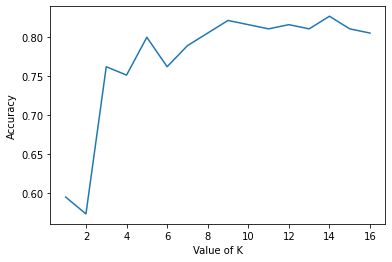

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [26]:
classifier = KNeighborsClassifier(n_neighbors = 14)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [36]:
from sklearn.model_selection import KFold


kf = KFold(n_splits=5)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [37]:
from sklearn.neural_network import MLPClassifier

clft = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clft.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [38]:
clft.predict(X_test)

array(['Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y